<a href="https://colab.research.google.com/github/BalaSankarG/Health-care-mini_project/blob/main/Patient_Risk_Prediction_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#mengubah data categoric
from sklearn.preprocessing import LabelEncoder

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2
from numpy import inf

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
print(dataset.shape)
print(dataset.head)

(5110, 12)
<bound method NDFrame.head of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private       

In [4]:
col_names = dataset.columns

col_names

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
dataset.columns = dataset.columns.str.strip()
dataset.columns
dataset['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [6]:
dataset['stroke'].value_counts()/np.float(len(dataset))

<ipython-input-6-de7e5d95fb59>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset['stroke'].value_counts()/np.float(len(dataset))


0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [7]:

del dataset['id']
del dataset['ever_married']
del dataset['work_type']
del dataset['Residence_type']
del dataset['bmi']
del dataset['smoking_status']

In [8]:
labelencoder = LabelEncoder()
dataset['gender'] = labelencoder.fit_transform(dataset['gender'])

In [9]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
stroke               0
dtype: int64

In [10]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   stroke             5110 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 239.7 KB


In [13]:
round(dataset.describe(),2)

,gender,age,hypertension,heart_disease,avg_glucose_level,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,5110.00
mean,0.41,43.23,0.1,0.05,106.15,0.05
std,0.49,22.61,0.3,0.23,45.28,0.22
min,0.00,0.08,0.0,0.00,55.12,0.00
25%,0.00,25.00,0.0,0.00,77.24,0.00
50%,0.00,45.00,0.0,0.00,91.88,0.00
75%,1.00,61.00,0.0,0.00,114.09,0.00
max,2.00,82.00,1.0,1.00,271.74,1.00


Text(0, 0.5, 'avg_glucose_level')

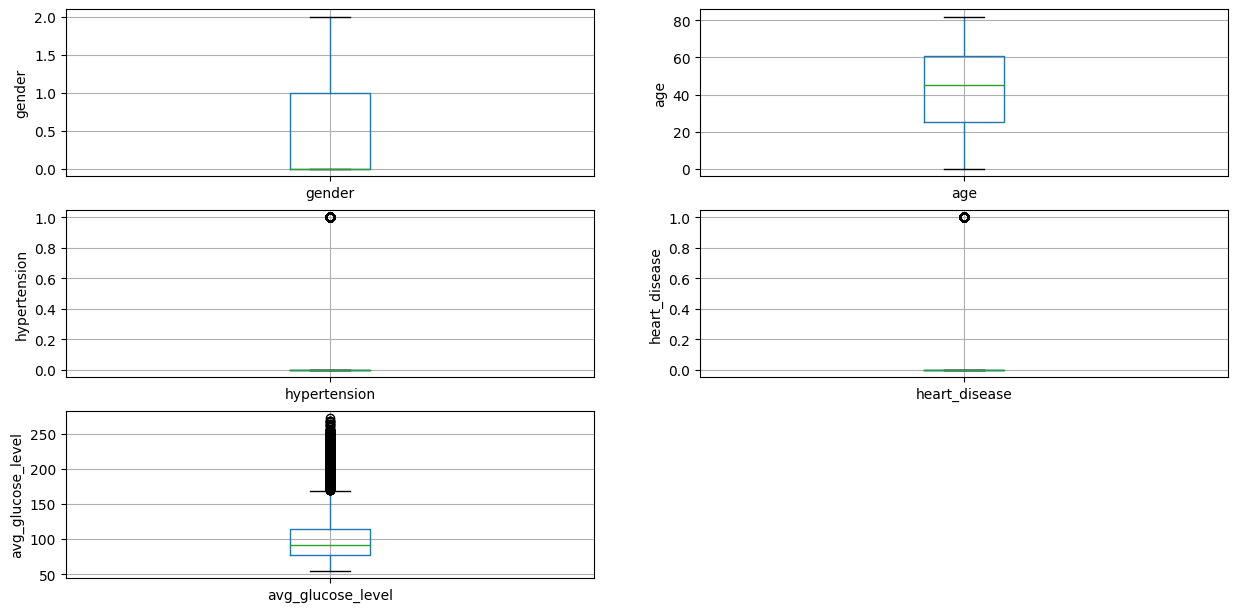

In [16]:
plt.figure(figsize=(15,10))


plt.subplot(4, 2, 1)
fig = dataset.boxplot(column='gender')
fig.set_title('')
fig.set_ylabel('gender')


plt.subplot(4, 2, 2)
fig = dataset.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')


plt.subplot(4, 2, 3)
fig = dataset.boxplot(column='hypertension')
fig.set_title('')
fig.set_ylabel('hypertension')


plt.subplot(4, 2, 4)
fig = dataset.boxplot(column='heart_disease')
fig.set_title('')
fig.set_ylabel('heart_disease')


plt.subplot(4, 2, 5)
fig = dataset.boxplot(column='avg_glucose_level')
fig.set_title('')
fig.set_ylabel('avg_glucose_level')

Text(0, 0.5, 'Number of pulsar stars')

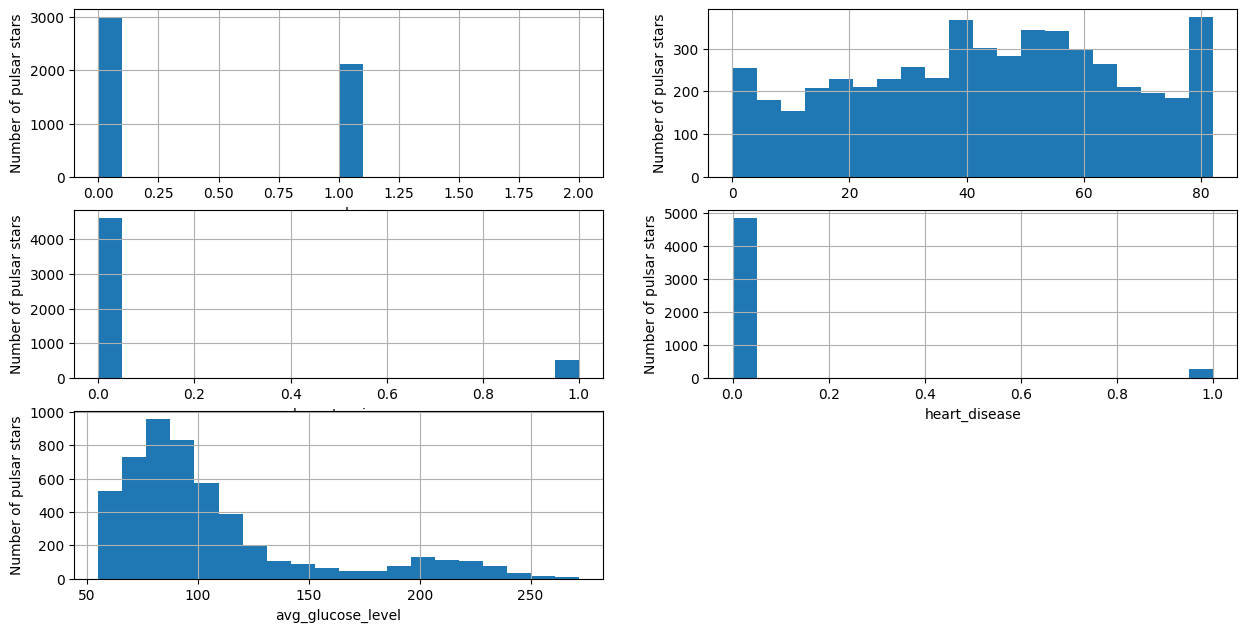

In [17]:
plt.figure(figsize=(15,10))


plt.subplot(4, 2, 1)
fig = dataset['gender'].hist(bins=20)
fig.set_xlabel('gender')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = dataset['age'].hist(bins=20)
fig.set_xlabel('age')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = dataset['hypertension'].hist(bins=20)
fig.set_xlabel('hypertension')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = dataset['heart_disease'].hist(bins=20)
fig.set_xlabel('heart_disease')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = dataset['avg_glucose_level'].hist(bins=20)
fig.set_xlabel('avg_glucose_level')
fig.set_ylabel('Number of pulsar stars')

In [20]:
dataset.fillna(999, inplace=True)
dataset

,gender,age,hypertension,heart_disease,avg_glucose_level,stroke
0,1,67.0,0,1,228.69,1
1,0,61.0,0,0,202.21,1
2,1,80.0,0,1,105.92,1
3,0,49.0,0,0,171.23,1
4,0,79.0,1,0,174.12,1
...,...,...,...,...,...,...
5105,0,80.0,1,0,83.75,0
5106,0,81.0,0,0,125.20,0
5107,0,35.0,0,0,82.99,0
5108,1,51.0,0,0,166.29,0


In [21]:
x = dataset.iloc[:,0:5]
y = dataset.iloc[:,5]

In [22]:

x

,gender,age,hypertension,heart_disease,avg_glucose_level
0,1,67.0,0,1,228.69
1,0,61.0,0,0,202.21
2,1,80.0,0,1,105.92
3,0,49.0,0,0,171.23
4,0,79.0,1,0,174.12
...,...,...,...,...,...
5105,0,80.0,1,0,83.75
5106,0,81.0,0,0,125.20
5107,0,35.0,0,0,82.99
5108,1,51.0,0,0,166.29


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [24]:
x_train.shape, x_test.shape

((4088, 5), (1022, 5))

In [25]:
y_test.shape, y_test.shape

((1022,), (1022,))

In [26]:
print(x.head(5))
print(y.head(5))

   gender   age  hypertension  heart_disease  avg_glucose_level
0       1  67.0             0              1             228.69
1       0  61.0             0              0             202.21
2       1  80.0             0              1             105.92
3       0  49.0             0              0             171.23
4       0  79.0             1              0             174.12
0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


Text(0.5, 1.0, 'testing')

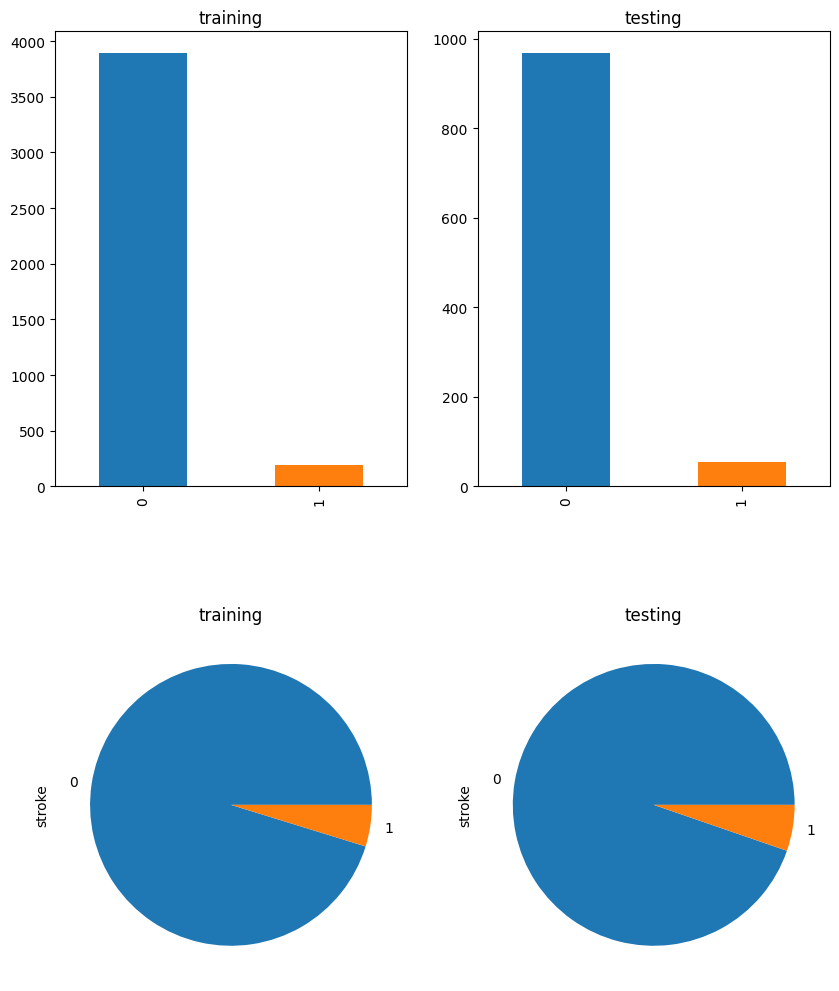

In [27]:
plt.figure(figsize=(10,13))
plt.subplot(2,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')
plt.subplot(2,2,3);y_train.value_counts().plot(kind='pie');plt.title('training')
plt.subplot(2,2,4);y_test.value_counts().plot(kind='pie',);plt.title('testing')

In [28]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
x_train

array([[-0.8361144 , -0.32824306, -0.33206349, -0.23963241, -0.86023092],
       [-0.8361144 , -0.41649391, -0.33206349, -0.23963241, -0.50170259],
       [ 1.193598  ,  0.73076708, -0.33206349, -0.23963241, -0.90725464],
       ...,
       [ 1.193598  ,  0.02476032, -0.33206349, -0.23963241, -0.25488321],
       [ 1.193598  , -0.9901244 , -0.33206349, -0.23963241,  0.32419302],
       [-0.8361144 ,  0.64251624,  3.01147232, -0.23963241, -1.03176818]])

In [30]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model.fit(x, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

              #crossvalidation
accuracy = cross_val_score(model,x,y, cv=5, scoring='accuracy')
precision = cross_val_score(model,x,y, cv=5, scoring='precision_weighted')
recall = cross_val_score(model,x,y, cv=5, scoring='recall_weighted')
f1 = cross_val_score(model,x,y, cv=5, scoring='f1_weighted')
print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('F1-Score', f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

accuracy [0.95107632 0.95107632 0.95107632 0.95107632 0.95205479]
precision [0.90454617 0.90454617 0.90454617 0.90454617 0.90640833]
recall [0.95107632 0.95107632 0.95107632 0.95107632 0.95205479]
F1-Score [0.92722787 0.92722787 0.92722787 0.92722787 0.92867099]


In [31]:

y_pred = model.predict(x_test)
print(y_test)
print(y_pred)

42      1
380     0
3524    0
352     0
4927    0
       ..
472     0
4446    0
660     0
57      1
2367    0
Name: stroke, Length: 1022, dtype: int64
[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



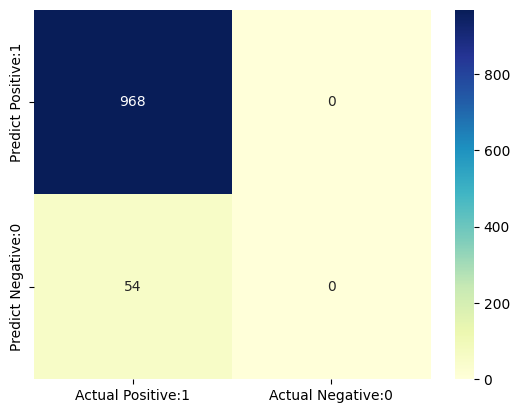

In [32]:
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred))

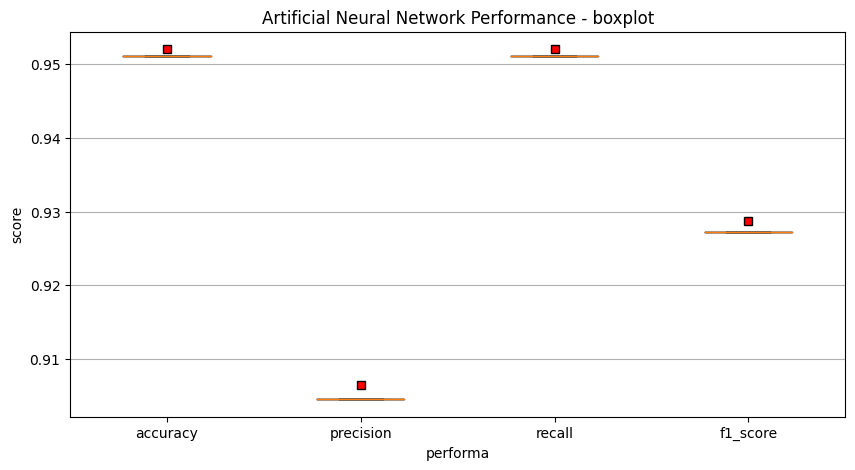

In [34]:
fig1, ax1 = plt.subplots(figsize=(10,5))

#green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')


# grouping
all_data = [accuracy,precision,recall,f1]
ax1.set_title('Artificial Neural Network Performance - boxplot')

# plot box plot
ax1.boxplot(all_data,notch=False,flierprops=red_square)




#adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('performa')
ax1.set_ylabel('score')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'accuracy','precision','recall','f1_score'])
plt.show()

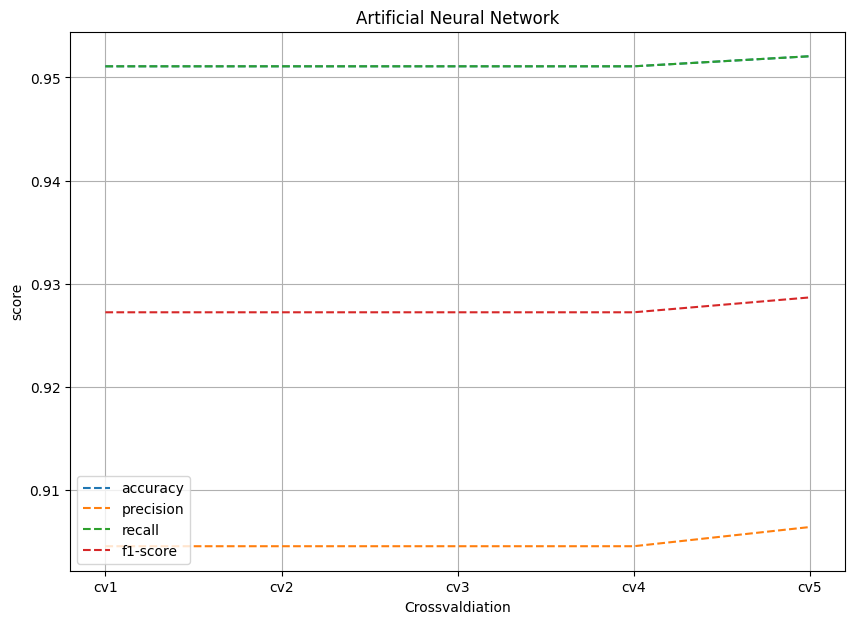

In [35]:

plt.figure(figsize=(10,7))
xx = ["cv1", "cv2", "cv3", "cv4", "cv5"] #, "cv6", "cv7", "cv8", "cv9", "cv10"
plt.plot(xx, accuracy, '--')
plt.plot(xx, precision, '--')
plt.plot(xx, recall, '--')
plt.plot(xx, f1, '--')
plt.title("Artificial Neural Network")
plt.xlabel("Crossvaldiation")
plt.ylabel("score")
plt.legend(["accuracy","precision", "recall", "f1-score"])
plt.grid()
plt.show()